In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Exploración de Datos

In [64]:
data = pd.read_csv('./data/depuracion.csv')
print(data.head())

    Fecha  Ventas Reales (unidades)  Ventas planificadas (unidades)
0  Jan-18                50000000.0                             NaN
1  Feb-18                42000000.0                             NaN
2  Mar-18                44000000.0                             NaN
3  Apr-18                43000000.0                             NaN
4  May-18                42500000.0                             NaN


In [65]:
print(data.isnull().sum())

Fecha                              0
Ventas Reales (unidades)           5
Ventas planificadas (unidades)    12
dtype: int64


In [66]:
print(data.dtypes)

Fecha                              object
Ventas Reales (unidades)          float64
Ventas planificadas (unidades)    float64
dtype: object


Alcontar con valores nulos y pocos datos, se procede a realizar una exploración de los datos para determinar la mejor forma de tratar los datos faltantes.

In [67]:
temp_summary = data.describe()
print(temp_summary)

       Ventas Reales (unidades)  Ventas planificadas (unidades)
count              1.900000e+01                            12.0
mean               5.018421e+07                      45000000.0
std                7.343195e+06                             0.0
min                3.900000e+07                      45000000.0
25%                4.350000e+07                      45000000.0
50%                5.000000e+07                      45000000.0
75%                5.500000e+07                      45000000.0
max                6.300000e+07                      45000000.0


Decidimos rellenar los valores faltantes con la media de los valores de la columna correspondiente. Esto se debe a que la media es un valor que se encuentra en el centro de los datos, y por lo tanto, es un valor que se encuentra en una posición razonable para reemplazar los valores faltantes.

In [68]:
data.fillna(data['Ventas Reales (unidades)'].mean(), inplace=True)

In [69]:
data.fillna(data['Ventas planificadas (unidades)'].mean(), inplace=True)

In [70]:
data['Fecha'] = pd.to_datetime(data['Fecha'], format='%b-%y')
df = data.sort_values('Fecha')

<Axes: >

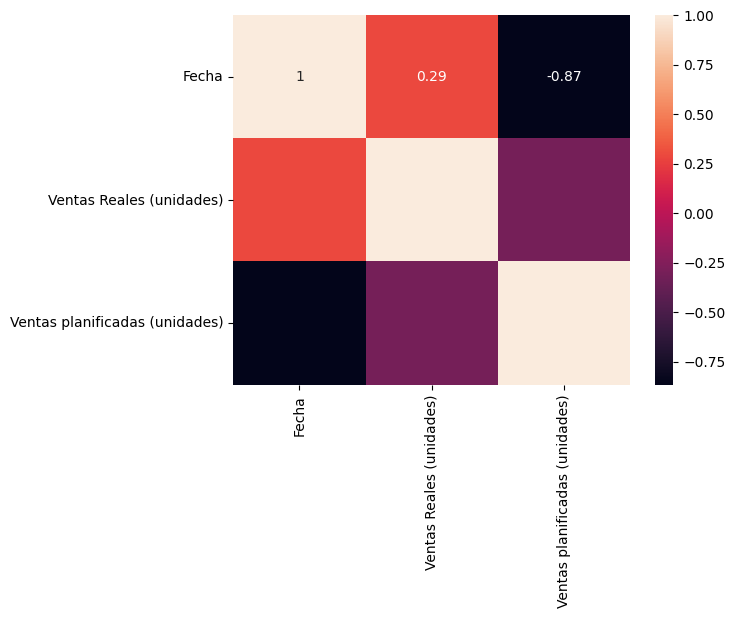

In [ ]:
correlation = df.corr()
sns.heatmap(correlation, annot=True)

##  Reducción de carga cognitiva: Gráfica simplificada

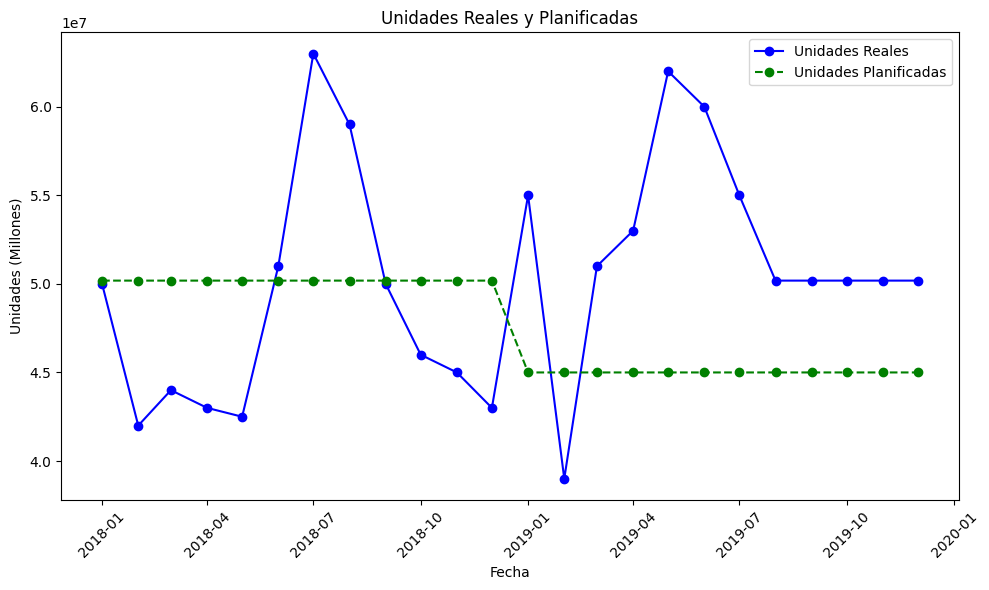

In [72]:
plt.figure(figsize=(10, 6))
plt.plot(df['Fecha'], df['Ventas Reales (unidades)'], label='Unidades Reales', color='blue', linestyle='-', marker='o')
plt.plot(df['Fecha'], df['Ventas planificadas (unidades)'], label='Unidades Planificadas', color='green', linestyle='--', marker='o')
plt.xticks(rotation=45)
plt.xlabel('Fecha')
plt.ylabel('Unidades (Millones)')
plt.title('Unidades Reales y Planificadas')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()


##  Principios de la Gestalt
### 1. Similitud
### 2. Proximidad
Para este inciso demostramos la proximidad al poner las barras una al lado de otra, ya que este concepto se refiere a qué tan cerca están los elementos entre sí. Chapman, C. (n.d.).
De igual manera, demostramos la similitud por medio de los colores usados los cuales son colores pastel muy parecidos, en gestalt, elementos similares se agrupan visualmente, independientemente de su proximidad entre sí Chapman, C. (n.d.).


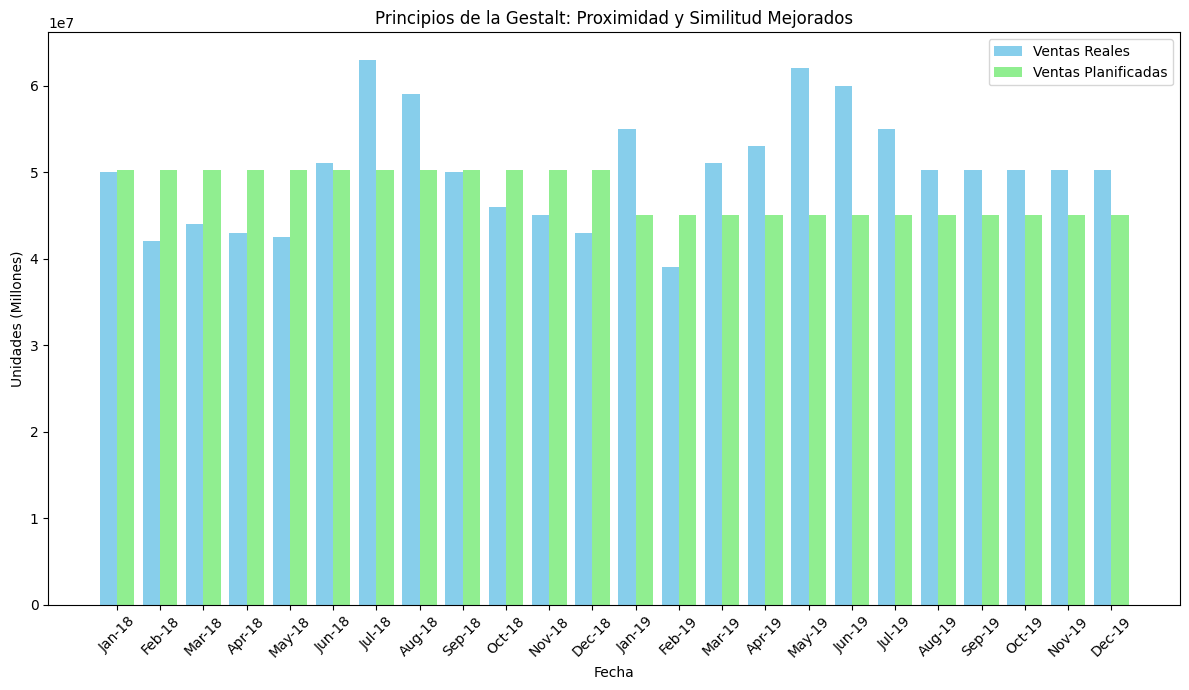

In [73]:
plt.figure(figsize=(12, 7))
bar_width = 0.4
indices = np.arange(len(df))

plt.bar(indices - bar_width / 2, df['Ventas Reales (unidades)'], width=bar_width, color='skyblue', label='Ventas Reales')
plt.bar(indices + bar_width / 2, df['Ventas planificadas (unidades)'], width=bar_width, color='lightgreen', label='Ventas Planificadas')

plt.xticks(indices, df['Fecha'].dt.strftime('%b-%y'), rotation=45)
plt.xlabel('Fecha')
plt.ylabel('Unidades (Millones)')
plt.title('Principios de la Gestalt: Proximidad y Similitud Mejorados')
plt.legend()
plt.tight_layout()
plt.show()

## Ética en la visualización
 La manipulación del eje Y hace que las variaciones entre las ventas reales y planificadas parezcan más dramáticas de lo que realmente son, mientras que la reducción de etiquetas en el eje X dificulta la interpretación precisa de los datos a lo largo del tiempo.

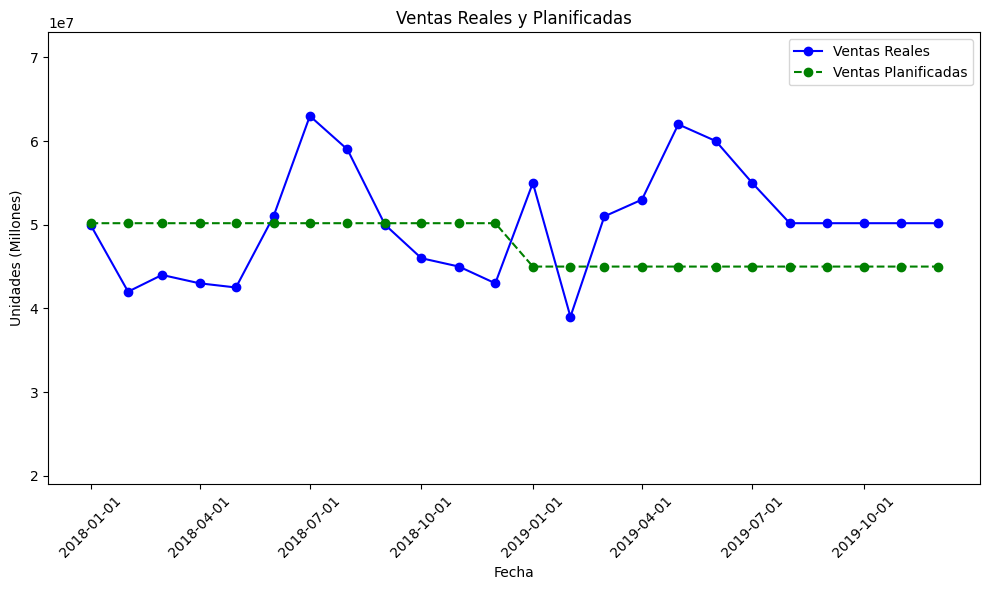

In [74]:
plt.figure(figsize=(10, 6))
plt.plot(df['Fecha'], df['Ventas Reales (unidades)'], label='Ventas Reales', color='blue', linestyle='-', marker='o')
plt.plot(df['Fecha'], df['Ventas planificadas (unidades)'], label='Ventas Planificadas', color='green', linestyle='--', marker='o')

# Manipulación en el eje Y 
plt.ylim(df['Ventas Reales (unidades)'].min() - 20000000, df['Ventas Reales (unidades)'].max() + 10000000)

# Manipulación en el eje X para reducir la cantidad de etiquetas
plt.xticks(df['Fecha'][::3], rotation=45)

plt.xlabel('Fecha')
plt.ylabel('Unidades (Millones)')
plt.title('Ventas Reales y Planificadas')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

## Comparación de visualizaciones

#### Predeterminada

/var/folders/gg/jfywq98d2qb3fdf1wqfhvk3m0000gn/T/ipykernel_81506/1116530362.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['Fecha'], y=df['Ventas Reales (unidades)'], color='lightgrey', edgecolor='black', linewidth=0.8, label='Visualización Predeterminada', ci=None)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packa

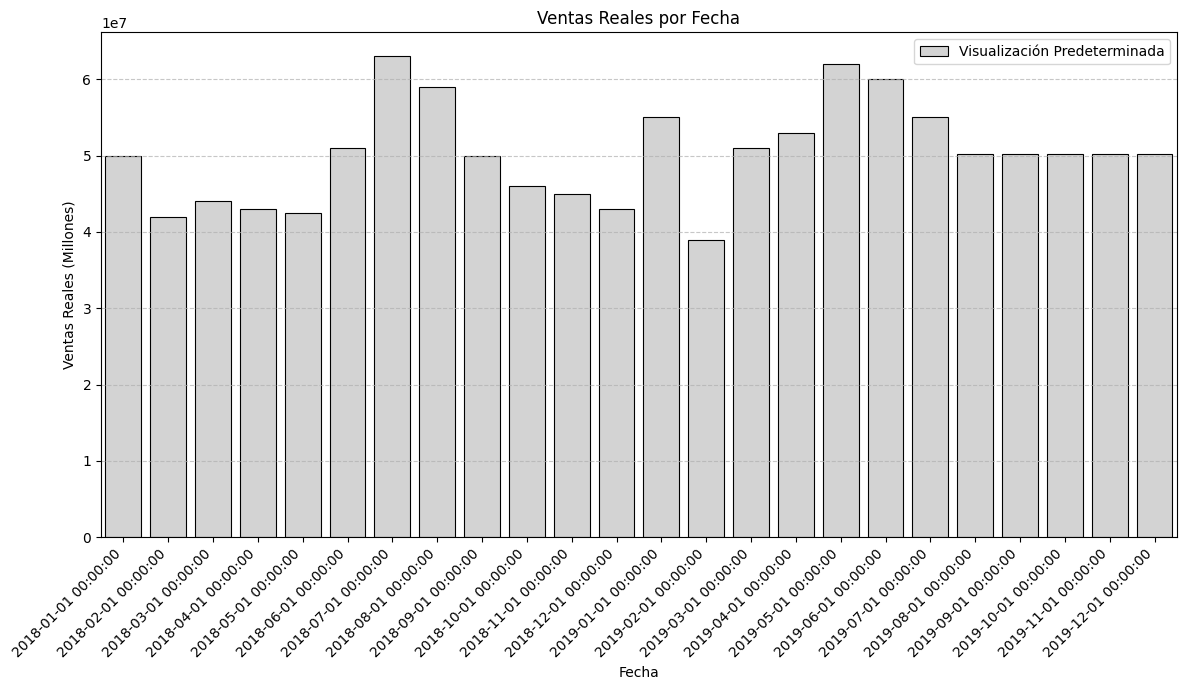

In [75]:
plt.figure(figsize=(12, 7))
sns.barplot(x=df['Fecha'], y=df['Ventas Reales (unidades)'], color='lightgrey', edgecolor='black', linewidth=0.8, label='Visualización Predeterminada', ci=None)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Fecha')
plt.ylabel('Ventas Reales (Millones)')
plt.title('Ventas Reales por Fecha')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Optimizada

/var/folders/gg/jfywq98d2qb3fdf1wqfhvk3m0000gn/T/ipykernel_81506/2193609732.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['Fecha'].dt.strftime('%b-%y'), y=df['Ventas Reales (unidades)'], color='skyblue', edgecolor='black', linewidth=0.8, ci=None)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcor

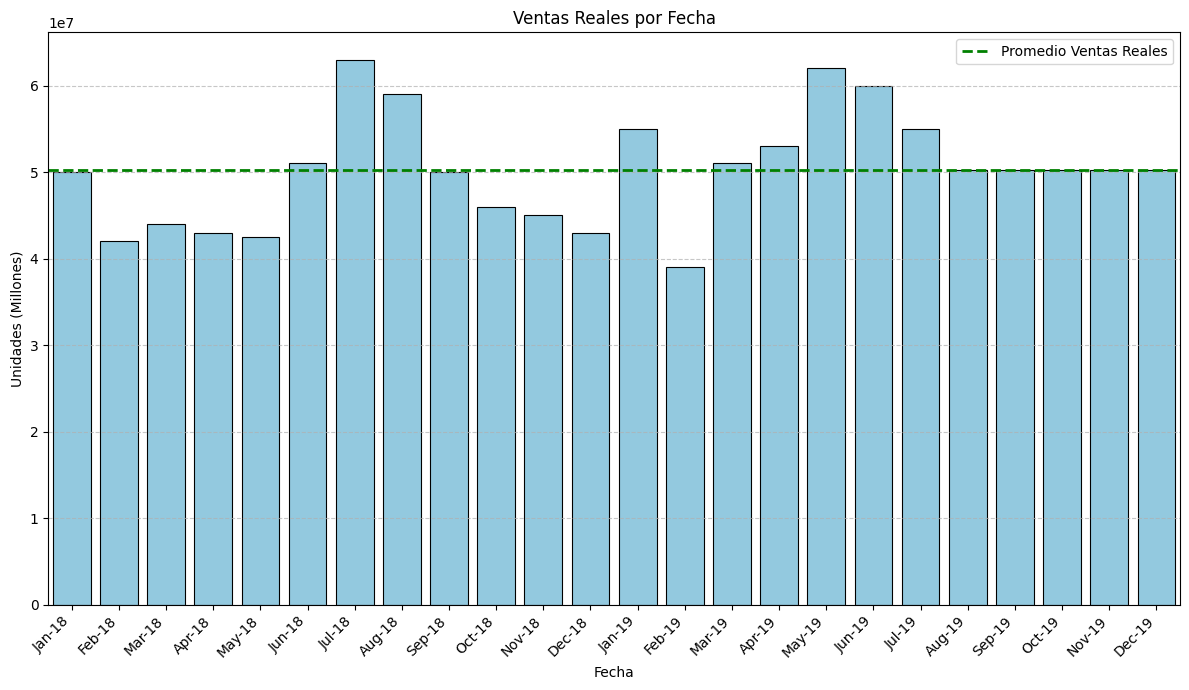

In [76]:
plt.figure(figsize=(12, 7))
sns.barplot(x=df['Fecha'].dt.strftime('%b-%y'), y=df['Ventas Reales (unidades)'], color='skyblue', edgecolor='black', linewidth=0.8, ci=None)
plt.axhline(y=df['Ventas Reales (unidades)'].mean(), color='green', linestyle='--', linewidth=2, label='Promedio Ventas Reales')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Fecha')
plt.ylabel('Unidades (Millones)')
plt.title('Ventas Reales por Fecha')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Atributos preatentivos
- 1. Color:  Los puntos rojos que representan las "Ventas Reales" son prominentes y se destacan en la visualización.
- 2. Tamaño: El tamaño de los puntos que representan las ventas reales es grande, esto hace que se destaquen en la visualización.
- 3. Forma: Se utilizó una línea discontinua azul para representar las "Ventas Planificadas". Esta forma es diferente a la de los puntos rojos que representan las "Ventas Reales", lo que permite distinguir entre las dos categorías de datos.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

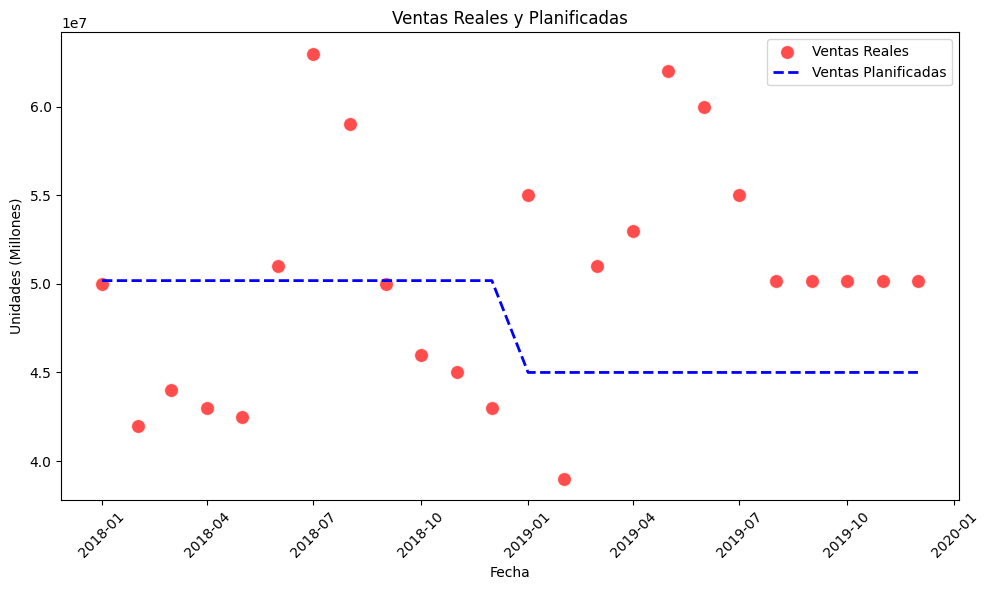

In [77]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Fecha'], y=df['Ventas Reales (unidades)'], color='red', s=100, label='Ventas Reales', alpha=0.7)  # Tamaño y color
sns.lineplot(x=df['Fecha'], y=df['Ventas planificadas (unidades)'], color='blue', linestyle='--', linewidth=2, label='Ventas Planificadas')  # Forma y color
plt.xticks(rotation=45)
plt.xlabel('Fecha')
plt.ylabel('Unidades (Millones)')
plt.title('Ventas Reales y Planificadas')
plt.legend()
plt.tight_layout()
plt.show()